# **🧠 Boltzmann Machine Implementation in Python**
The **Boltzmann Machine** is a stochastic neural network that learns by adjusting weights to minimize energy. It differs from the Hopfield network by incorporating **stochastic neuron updates** and using **gradient-based learning**.

---

### **⚡ Key Features**
✅ Uses **binary stochastic neurons** (sigmoid activation)  
✅ **Trains with Gibbs Sampling & Contrastive Divergence (CD-1)**  
✅ Supports **hidden and visible units**  
✅ Learns patterns from data like **RBMs (Restricted Boltzmann Machines)**  

---

---

### **📝 Explanation**
1. **Neurons are Stochastic:**  
   - Neurons fire based on a probability derived from a **sigmoid function**.
2. **Training with Contrastive Divergence (CD-1):**  
   - **Positive Phase:** Compute hidden activations based on input.  
   - **Negative Phase:** Generate a new visible state using **Gibbs Sampling**.  
   - **Update Weights:** Adjust weights using the difference between positive and negative phases.  
3. **Inference (Reconstruction):**  
   - A test pattern is passed through the network, and Gibbs sampling reconstructs it.

---

### **🔥 Real-World Applications**
✅ **Feature Learning** (Used in **RBMs** for deep learning)  
✅ **Pattern Completion** (Recovering missing parts of an input)  
✅ **Optimization Problems** (Solving combinatorial optimization tasks)  
✅ **Cognitive Modeling** (Simulating neural processes in the brain)  

---

### **⚠️ Weaknesses**
❌ **Slow Training** (Contrastive Divergence requires iterative sampling)  
❌ **Difficult Hyperparameter Tuning** (Learning rate, number of hidden units, etc.)  
❌ **Scaling Issues** (Training large networks is computationally expensive)  

---

Would you like to integrate it with **real-world datasets** (e.g., MNIST) for better visualization? 🚀


In [ ]:
import numpy as np

class BoltzmannMachine:
    def __init__(self, num_visible, num_hidden):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.num_units = num_visible + num_hidden

        # Initialize weights and biases
        self.weights = np.random.normal(0, 0.1, (self.num_units, self.num_units))
        np.fill_diagonal(self.weights, 0)  # No self-connections
        self.visible_bias = np.zeros(self.num_visible)
        self.hidden_bias = np.zeros(self.num_hidden)

    def sigmoid(self, x):
        """Sigmoid activation function for stochastic updates."""
        return 1 / (1 + np.exp(-x))

    def sample_neurons(self, probabilities):
        """Sample binary values based on probabilities."""
        return (np.random.rand(len(probabilities)) < probabilities).astype(int)

    def gibbs_sampling(self, visible):
        """Perform one step of Gibbs sampling."""
        hidden_prob = self.sigmoid(np.dot(visible, self.weights[:self.num_visible, self.num_visible:]) + self.hidden_bias)
        hidden_states = self.sample_neurons(hidden_prob)

        visible_prob = self.sigmoid(np.dot(hidden_states, self.weights[self.num_visible:, :self.num_visible]) + self.visible_bias)
        visible_states = self.sample_neurons(visible_prob)

        return visible_states, hidden_states

    def train(self, data, learning_rate=0.1, epochs=1000):
        """Train using Contrastive Divergence (CD-1)."""
        data = np.array(data)

        for epoch in range(epochs):
            for sample in data:
                # Positive phase (data-driven)
                visible_pos = sample
                hidden_prob_pos = self.sigmoid(np.dot(visible_pos, self.weights[:self.num_visible, self.num_visible:]) + self.hidden_bias)
                hidden_pos = self.sample_neurons(hidden_prob_pos)

                # Negative phase (reconstruction via Gibbs sampling)
                visible_neg, hidden_neg = self.gibbs_sampling(visible_pos)

                # Update weights and biases
                self.weights[:self.num_visible, self.num_visible:] += learning_rate * (np.outer(visible_pos, hidden_pos) - np.outer(visible_neg, hidden_neg))
                self.weights[self.num_visible:, :self.num_visible] = self.weights[:self.num_visible, self.num_visible:].T  # Symmetric weights

                self.visible_bias += learning_rate * (visible_pos - visible_neg)
                self.hidden_bias += learning_rate * (hidden_pos - hidden_neg)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}/{epochs}")

    def reconstruct(self, input_data):
        """Reconstruct visible data from the hidden layer."""
        input_data = np.array(input_data)
        _, hidden_states = self.gibbs_sampling(input_data)

        # Correct shape mismatch: Use hidden states to reconstruct visible units
        visible_prob = self.sigmoid(np.dot(hidden_states, self.weights[self.num_visible:, :self.num_visible]) + self.visible_bias)
        reconstructed_visible = self.sample_neurons(visible_prob)

        return reconstructed_visible

# Example Usage
num_visible = 8  # Number of visible units
num_hidden = 4   # Number of hidden units
bm = BoltzmannMachine(num_visible, num_hidden)

# Create training data (Binary Patterns)
training_data = [
    [1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1],
    [1, 1, 1, 0, 0, 0, 1, 1]
]

bm.train(training_data, learning_rate=0.1, epochs=1000)

# Test with a noisy pattern
test_pattern = [1, 0, 1, 0, 0, 0, 1, 0]
reconstructed_pattern = bm.reconstruct(test_pattern)
print("Input Pattern:", test_pattern)
print("Reconstructed Pattern:", reconstructed_pattern)


Epoch 0/1000
Epoch 100/1000
Epoch 200/1000
Epoch 300/1000
Epoch 400/1000
Epoch 500/1000
Epoch 600/1000
Epoch 700/1000
Epoch 800/1000
Epoch 900/1000
Input Pattern: [1, 0, 1, 0, 0, 0, 1, 0]
Reconstructed Pattern: [1 0 1 0 1 0 1 0]


In [ ]:
def sample_neurons(probabilities):
    """Sample binary values based on probabilities."""
    random_probs = np.random.rand(len(probabilities))
    print(random_probs)
    return (random_probs < probabilities).astype(int)
print(sample_neurons([0.5,0.2,0.3]))

num_units = 16
weights = np.random.normal(0, 0.1, (num_units, num_units))
print(weights.shape)

[0.74266595 0.83832965 0.1786093 ]
[0 0 1]
(16, 16)


# Restricted Boltzmann Machine
Only connections between visible and hidden units (no intra-layer connections).

Using device: cuda
Epoch 1/50 | Loss: -23.8201
Epoch 2/50 | Loss: -15.3750


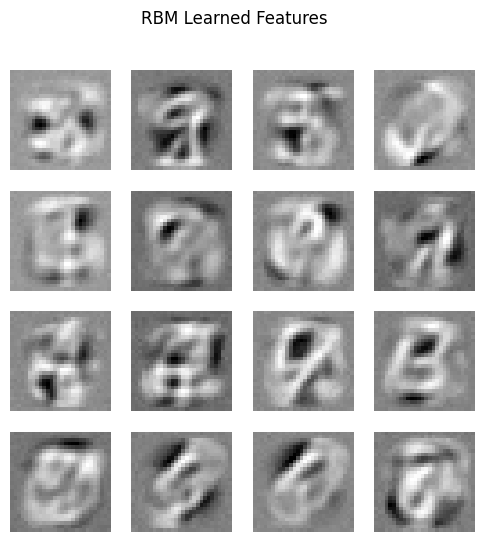

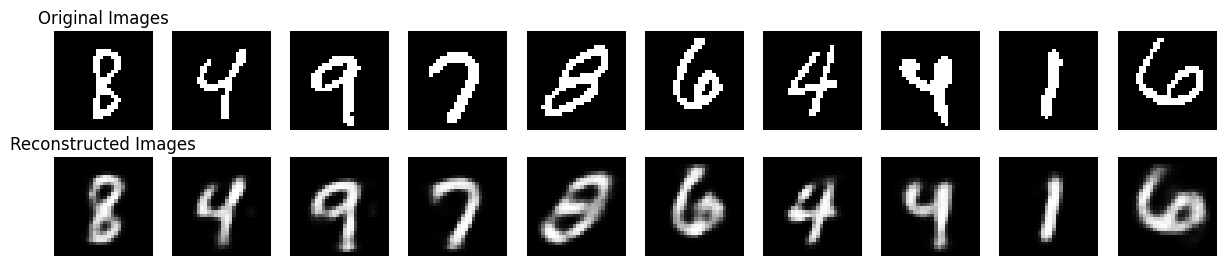

Epoch 3/50 | Loss: -14.0209
Epoch 4/50 | Loss: -12.9044


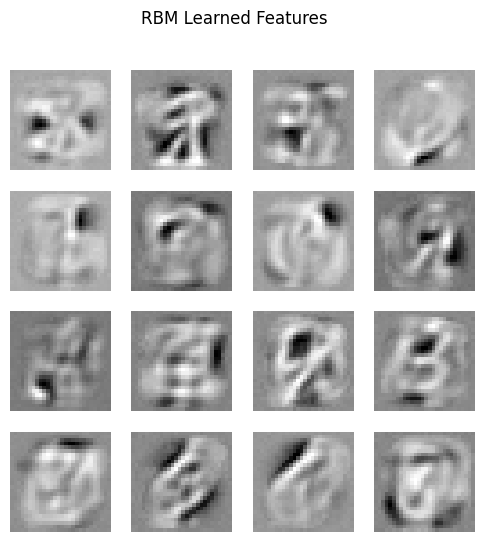

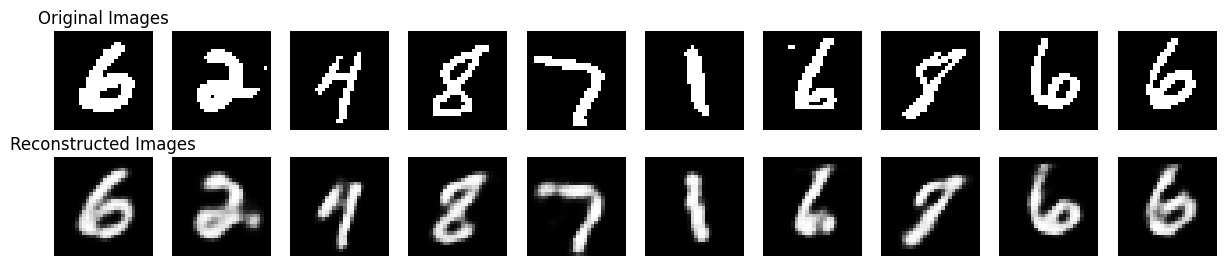

Epoch 5/50 | Loss: -11.9694
Epoch 6/50 | Loss: -11.1570


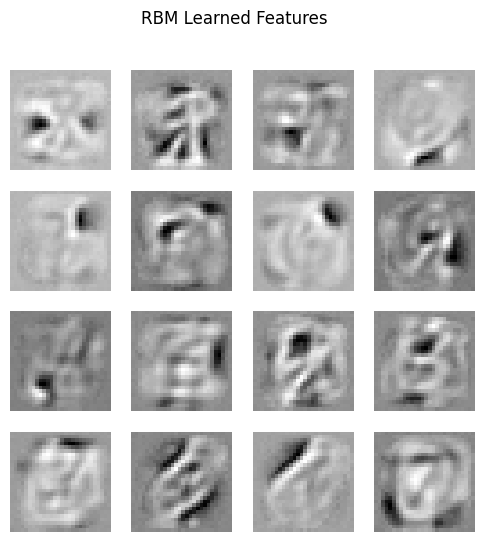

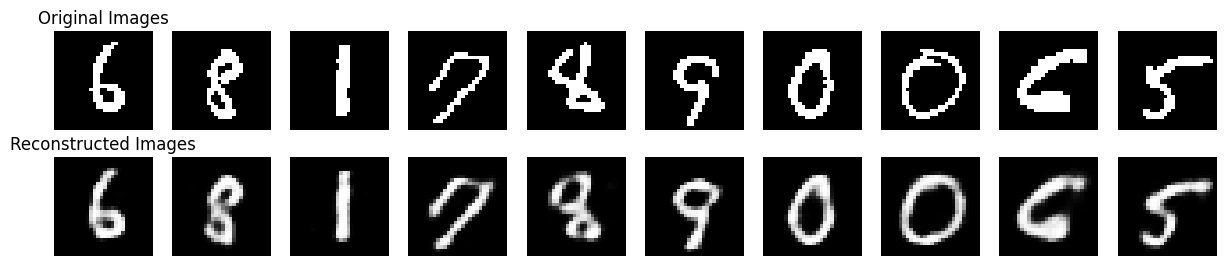

Epoch 7/50 | Loss: -10.3948
Epoch 8/50 | Loss: -9.7594


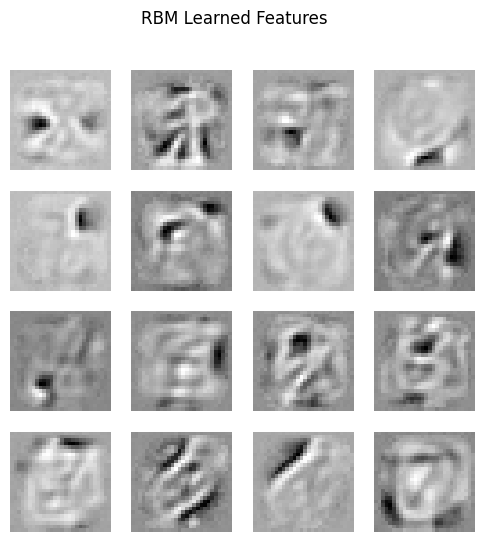

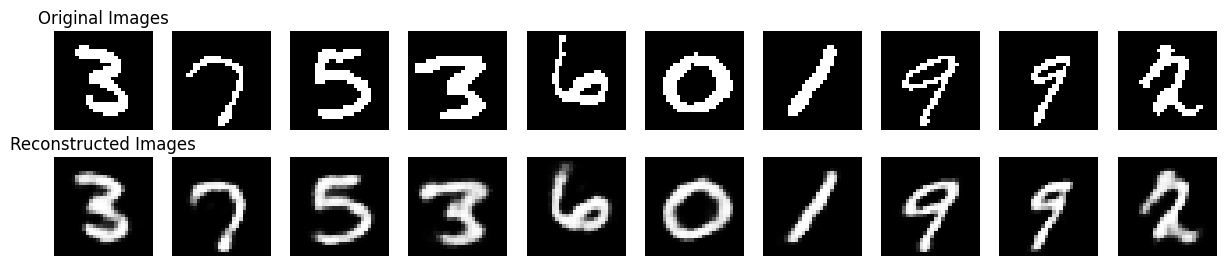

Epoch 9/50 | Loss: -9.1411
Epoch 10/50 | Loss: -8.5751


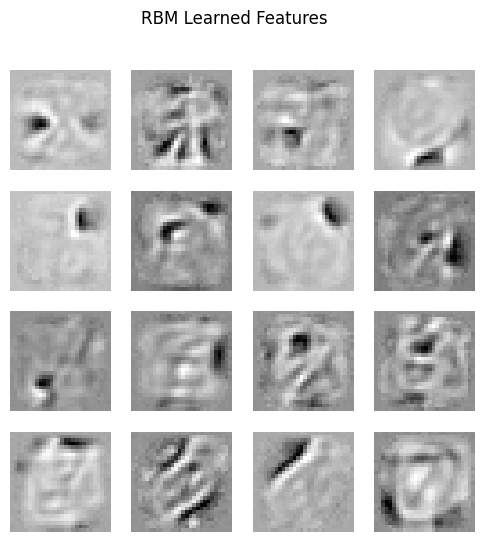

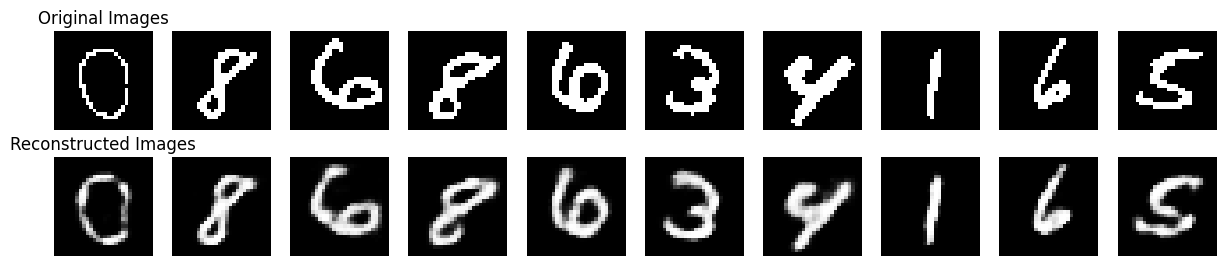

Epoch 11/50 | Loss: -8.0420
Epoch 12/50 | Loss: -7.6164


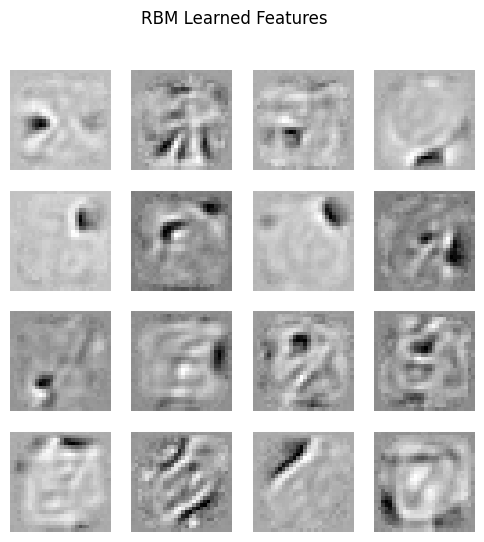

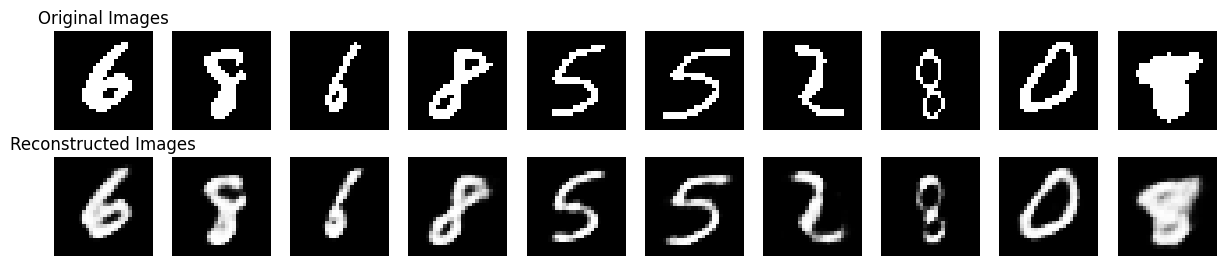

Epoch 13/50 | Loss: -7.1362
Epoch 14/50 | Loss: -6.6785


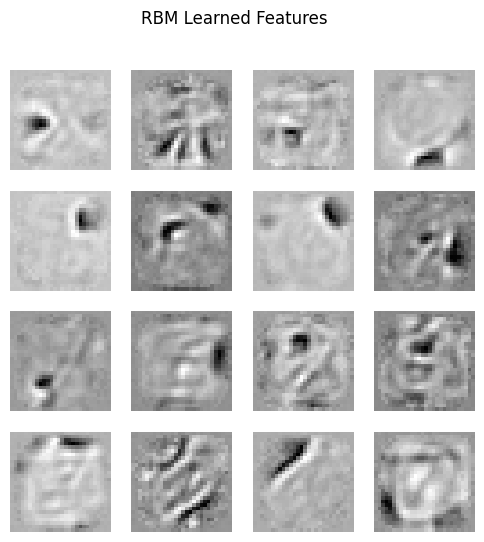

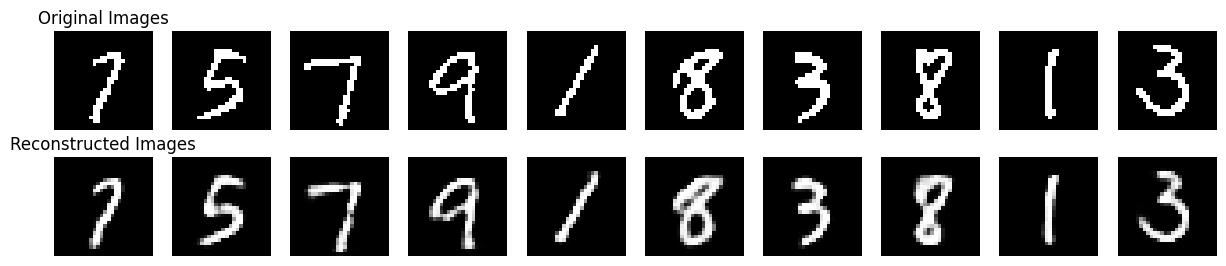

Epoch 15/50 | Loss: -6.3049
Epoch 16/50 | Loss: -5.9421


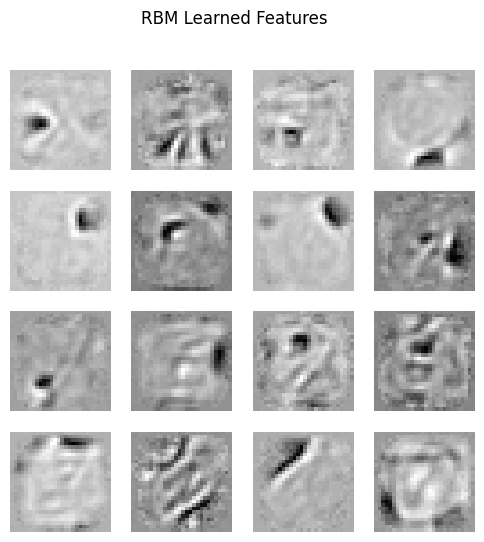

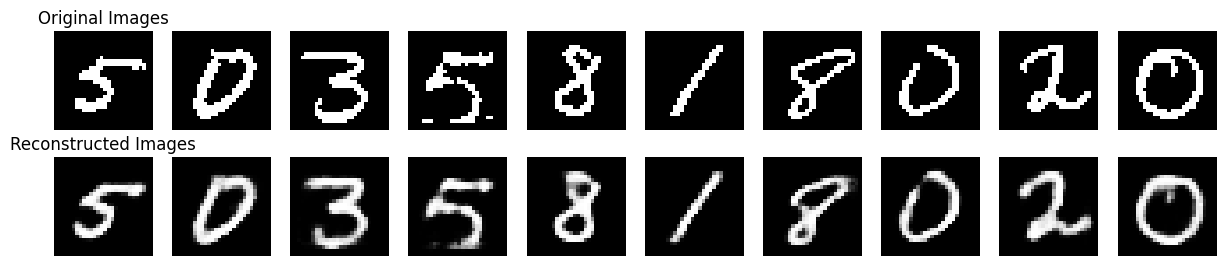

Epoch 17/50 | Loss: -5.6677
Epoch 18/50 | Loss: -5.3956


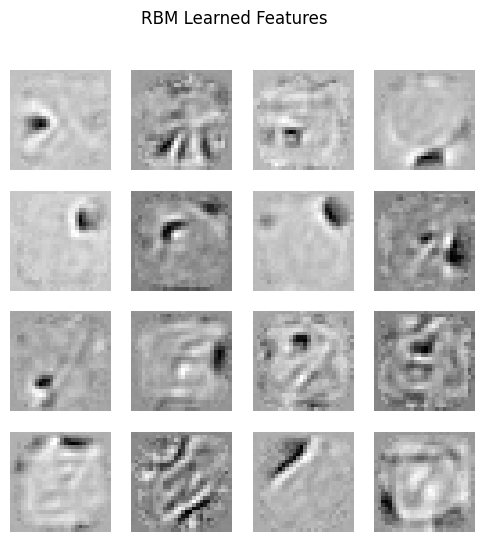

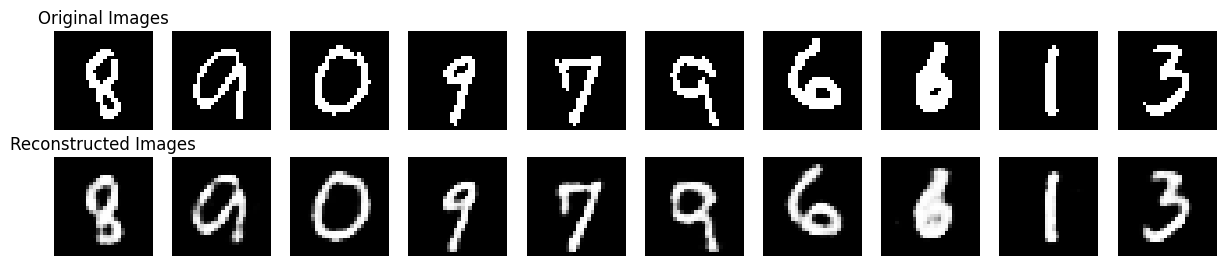

Epoch 19/50 | Loss: -5.1527
Epoch 20/50 | Loss: -4.9149


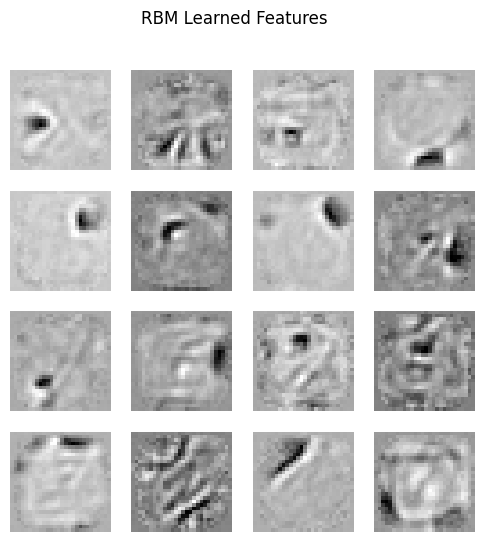

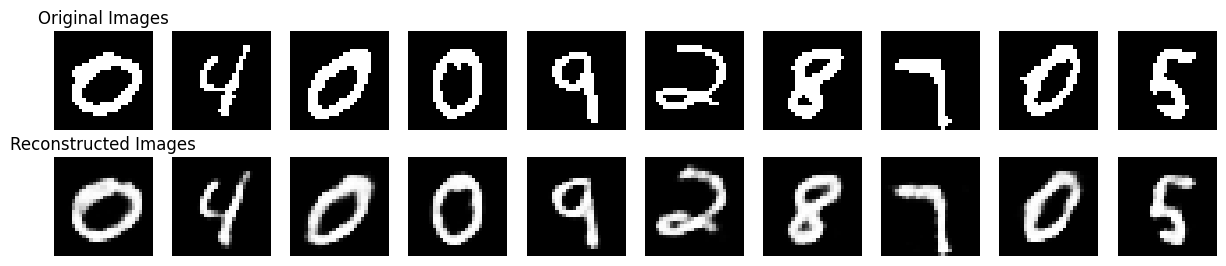

Epoch 21/50 | Loss: -4.6316
Epoch 22/50 | Loss: -4.4567


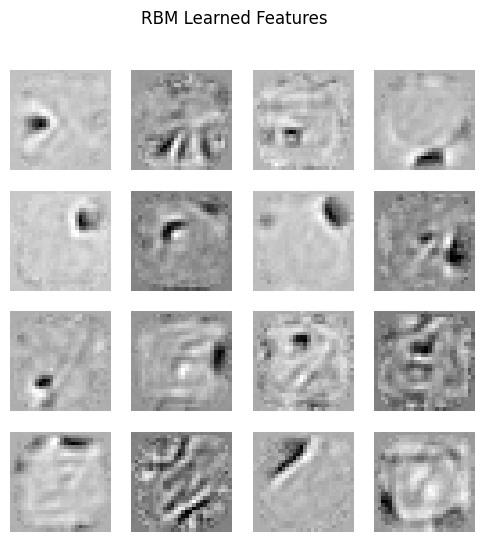

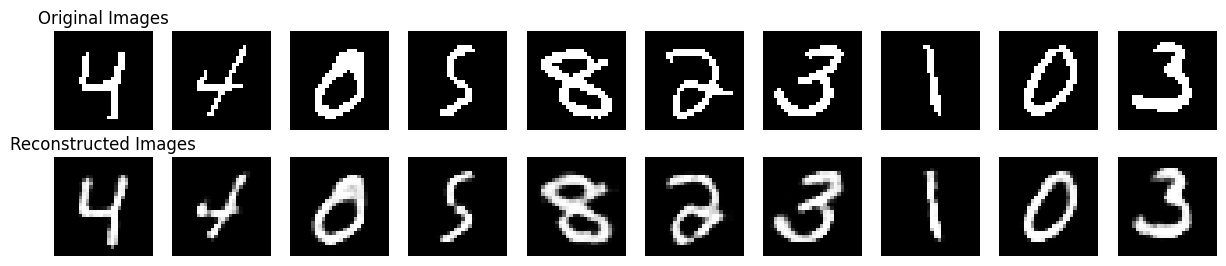

Epoch 23/50 | Loss: -4.3255
Epoch 24/50 | Loss: -4.1094


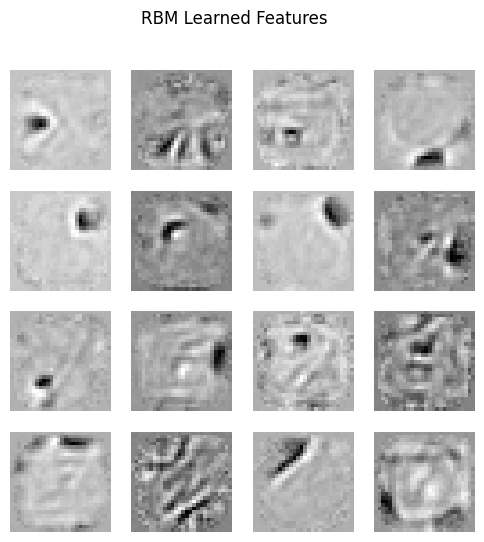

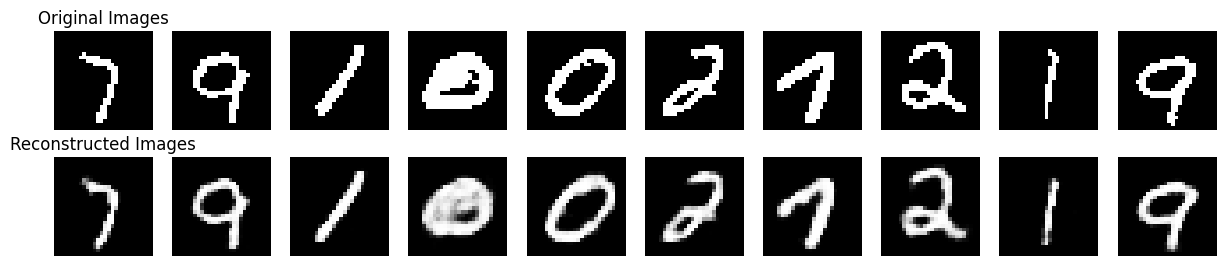

Epoch 25/50 | Loss: -3.9715
Epoch 26/50 | Loss: -3.8919


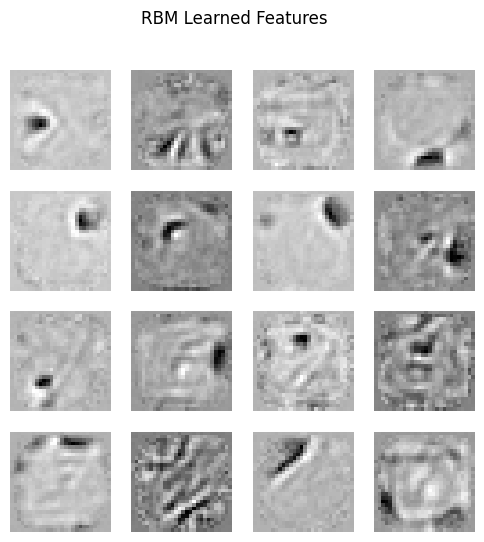

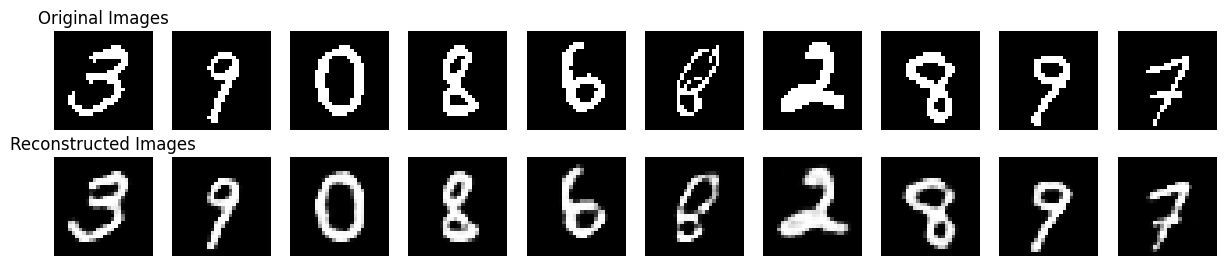

Epoch 27/50 | Loss: -3.6711
Epoch 28/50 | Loss: -3.5700


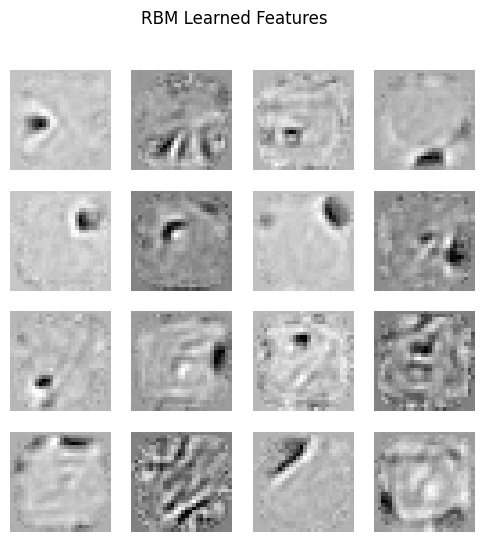

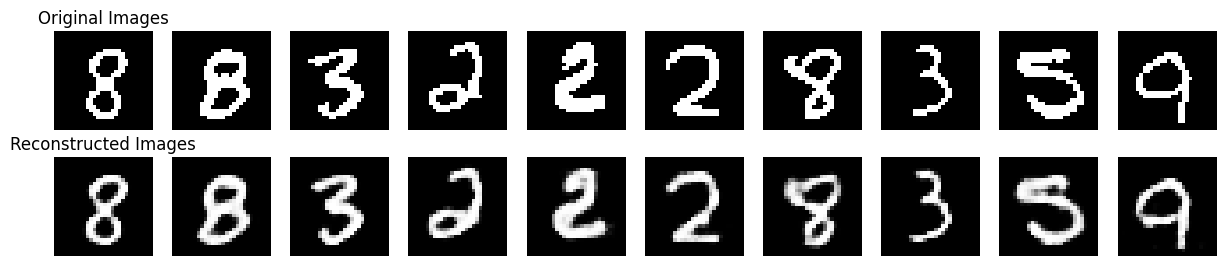

Epoch 29/50 | Loss: -3.5144
Epoch 30/50 | Loss: -3.3138


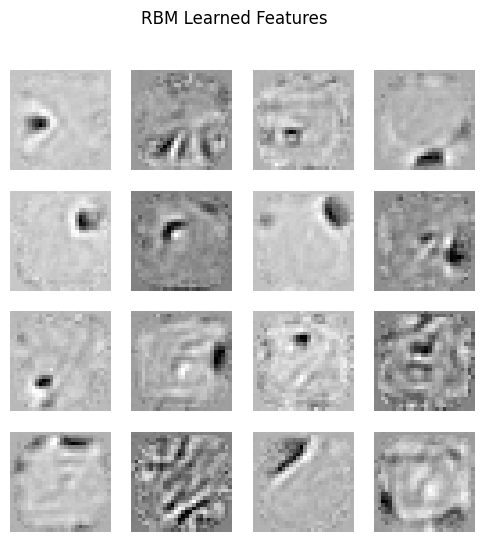

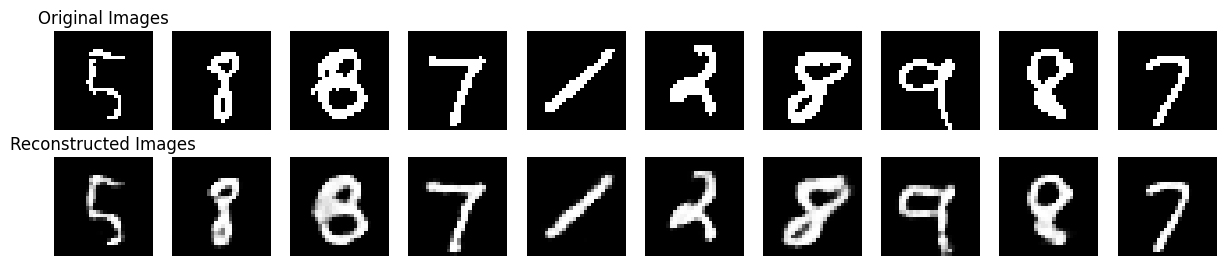

Epoch 31/50 | Loss: -3.3060
Epoch 32/50 | Loss: -3.1548


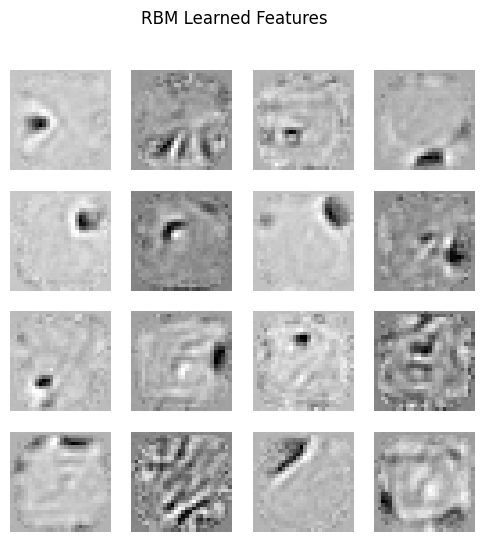

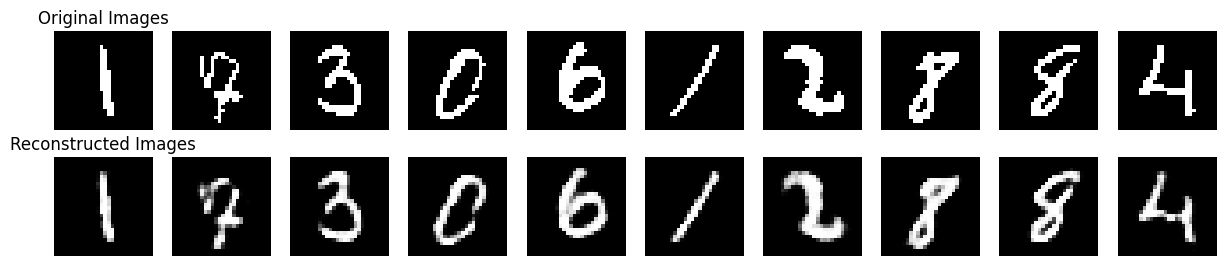

Epoch 33/50 | Loss: -3.1320
Epoch 34/50 | Loss: -3.0531


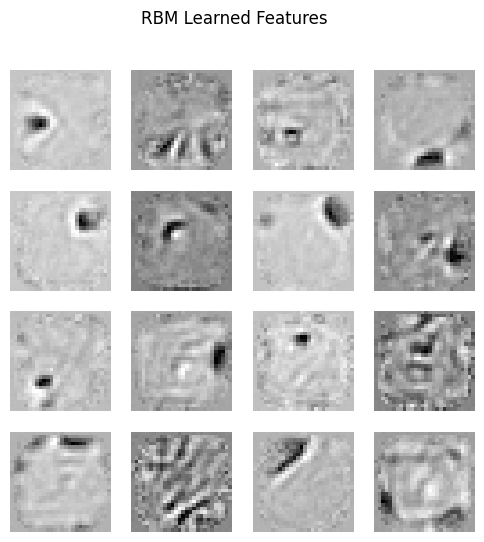

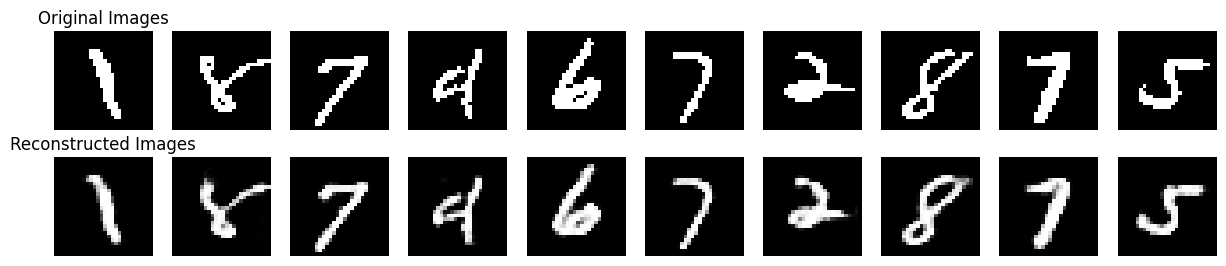

Epoch 35/50 | Loss: -2.9624
Epoch 36/50 | Loss: -2.8948


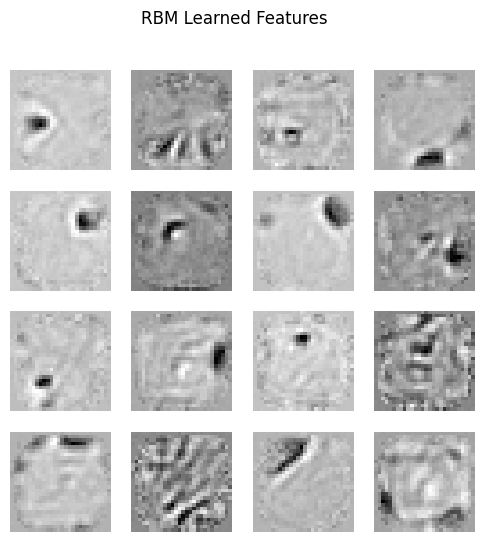

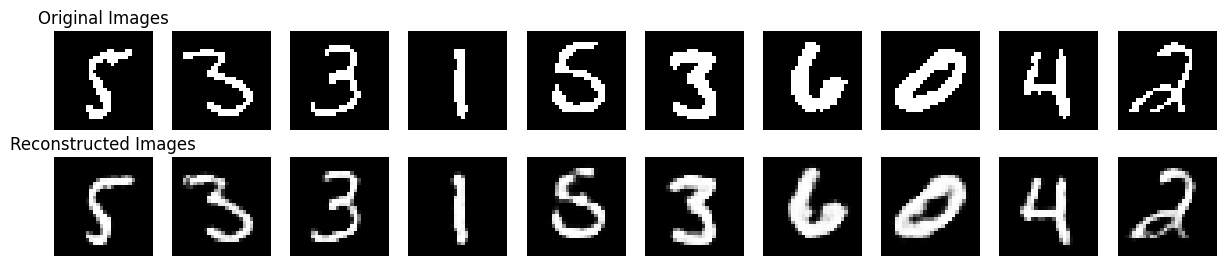

Epoch 37/50 | Loss: -2.7712
Epoch 38/50 | Loss: -2.7172


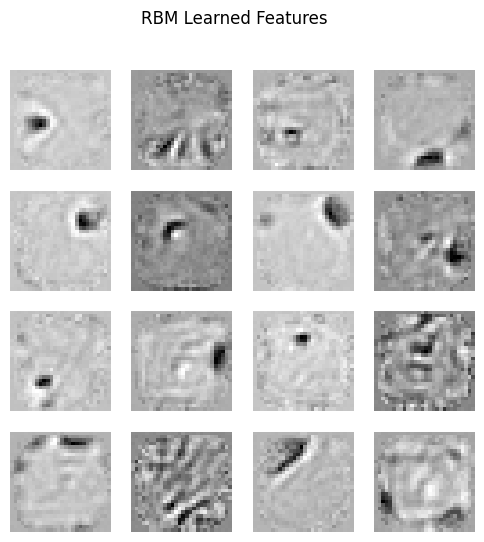

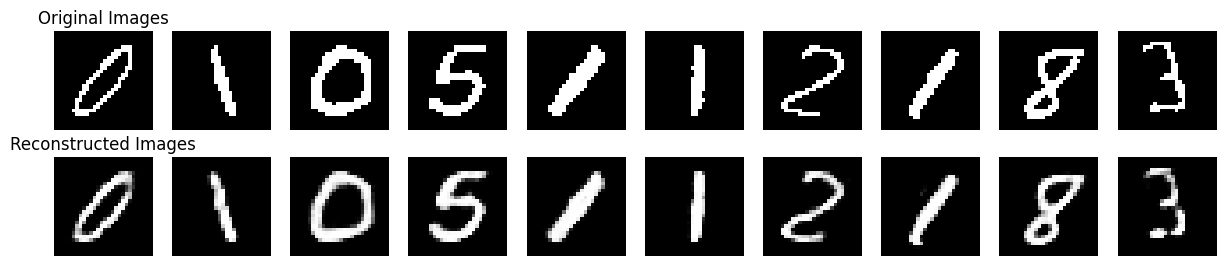

Epoch 39/50 | Loss: -2.6705
Epoch 40/50 | Loss: -2.6159


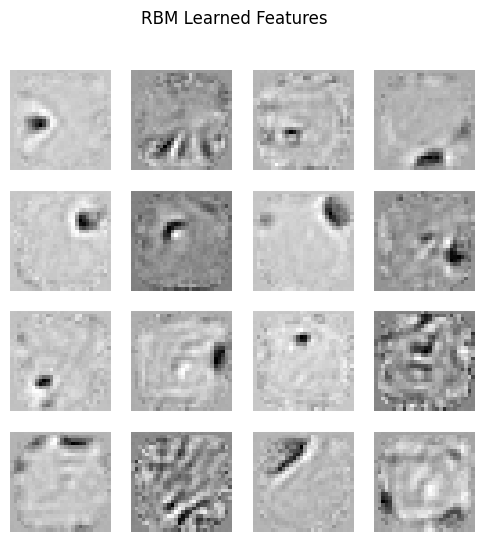

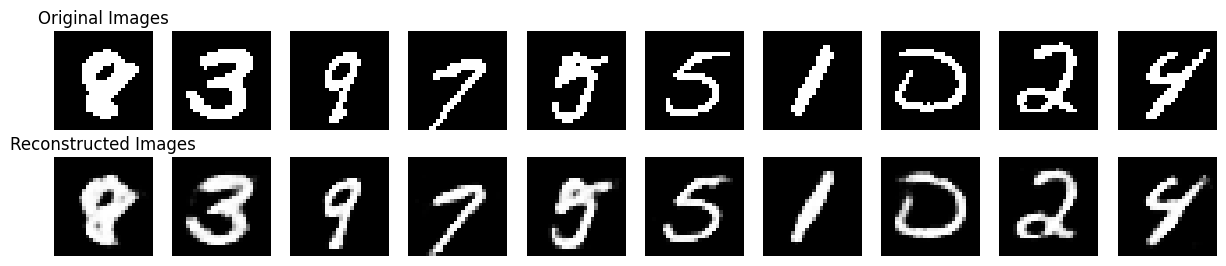

Epoch 41/50 | Loss: -2.5467
Epoch 42/50 | Loss: -2.5222


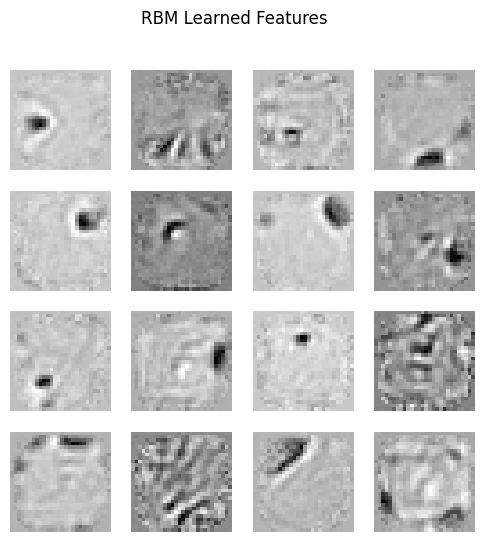

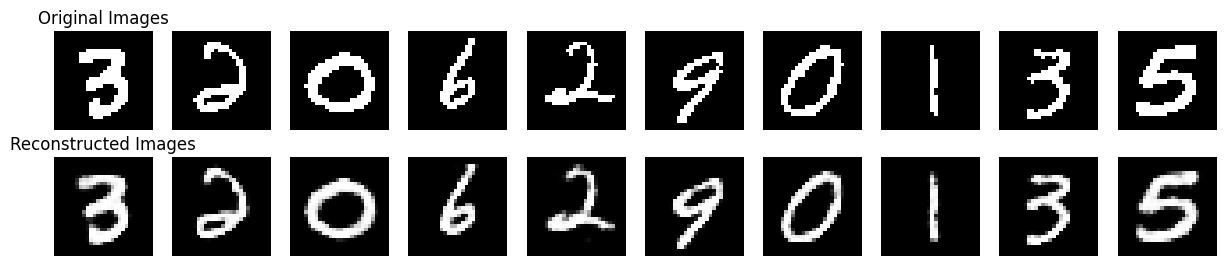

Epoch 43/50 | Loss: -2.4692
Epoch 44/50 | Loss: -2.4191


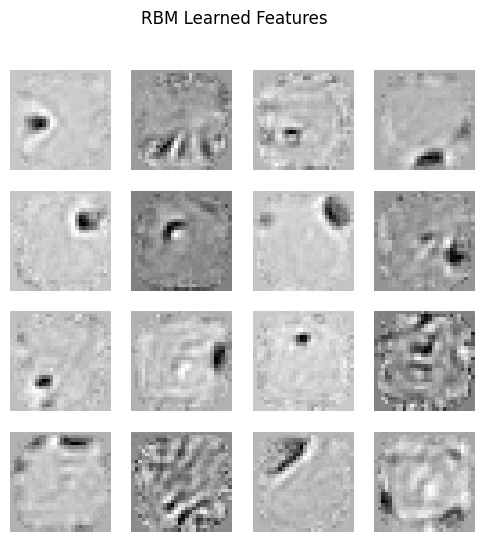

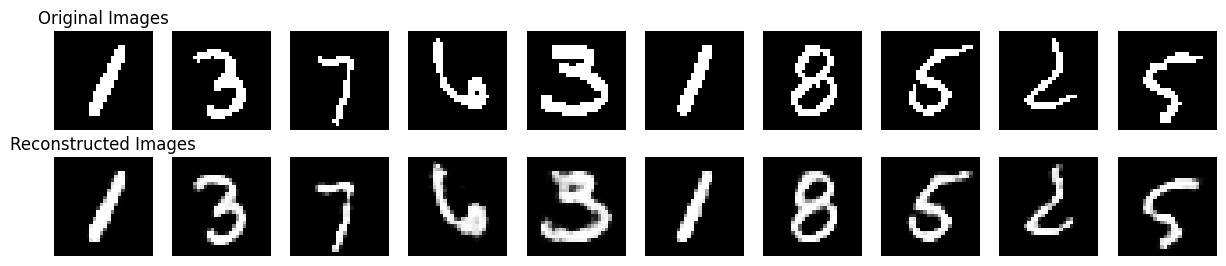

Epoch 45/50 | Loss: -2.3421
Epoch 46/50 | Loss: -2.3337


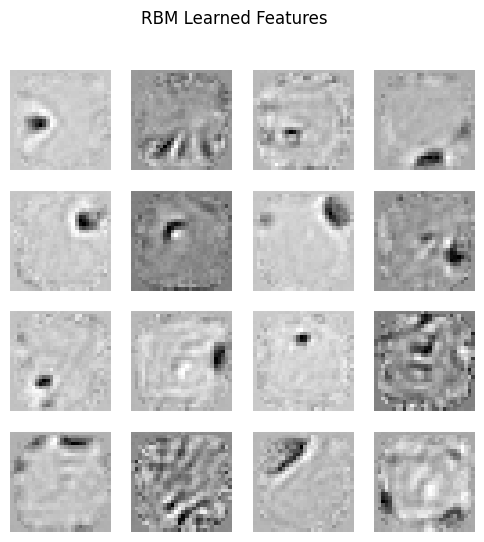

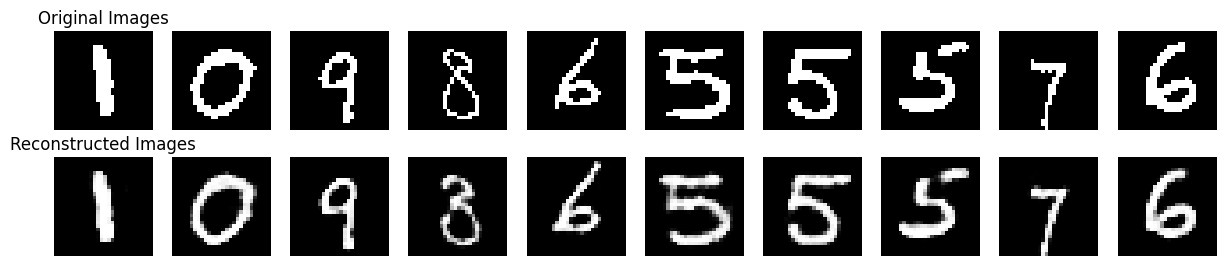

Epoch 47/50 | Loss: -2.3147
Epoch 48/50 | Loss: -2.2425


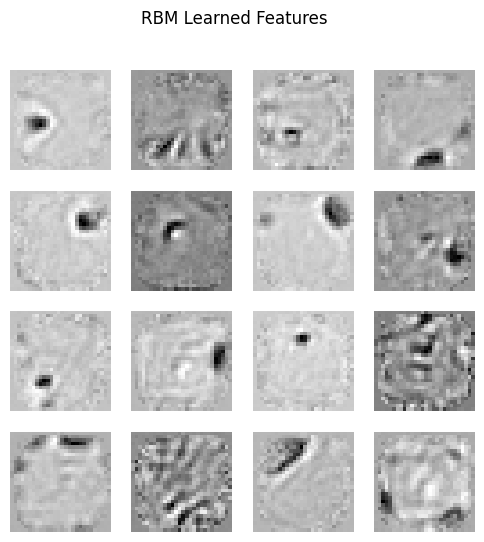

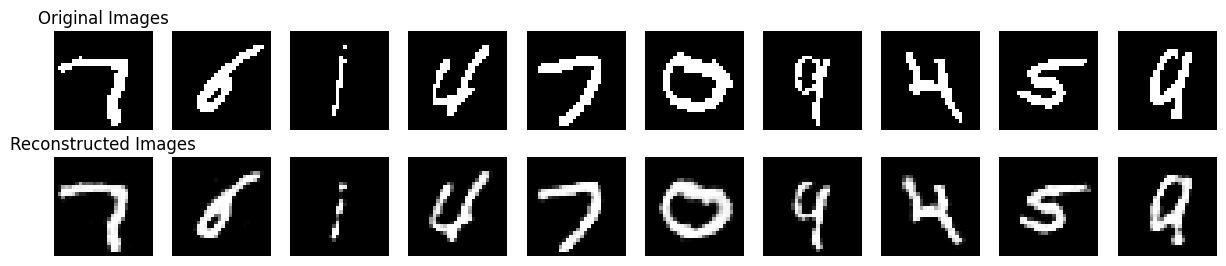

Epoch 49/50 | Loss: -2.2576
Epoch 50/50 | Loss: -2.1924


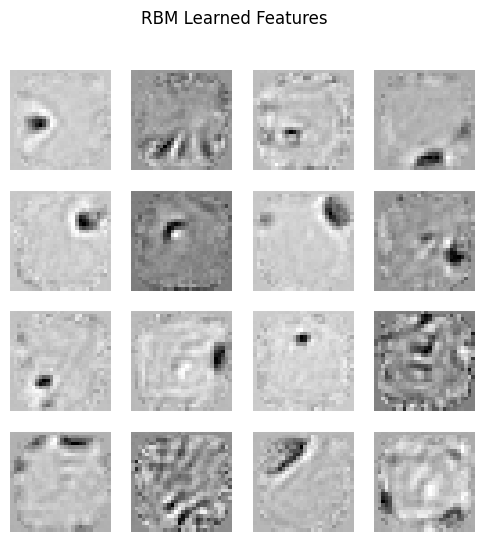

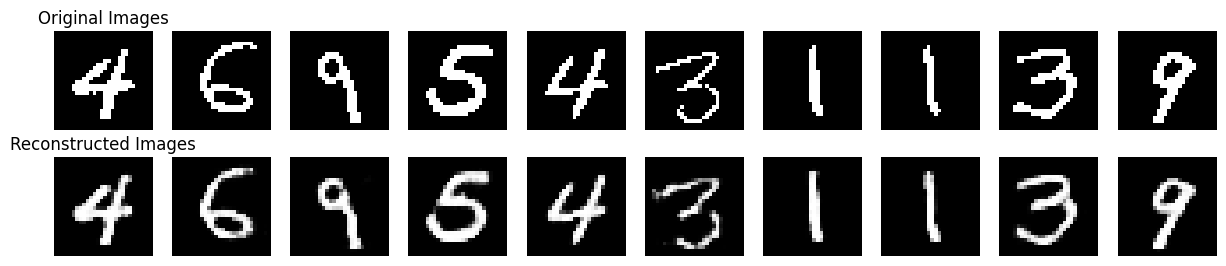

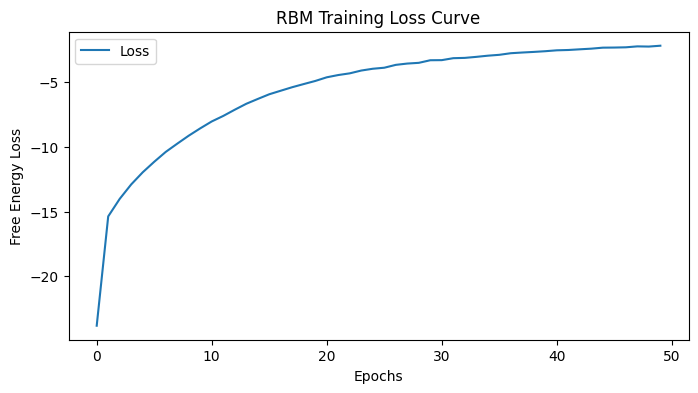


--- RBM Evaluation on Unseen Data ---
Mean Squared Error (MSE): 0.01438
Structural Similarity Index (SSIM): 0.89104
Peak Signal-to-Noise Ratio (PSNR): 18.89019


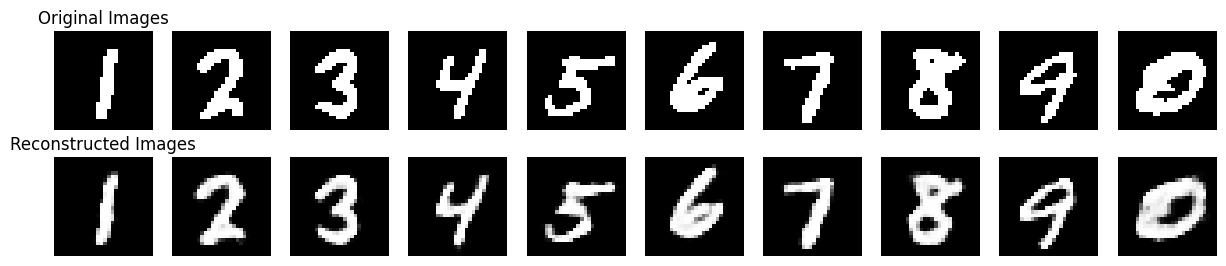

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load MNIST Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: (x > 0.5).float())])  # Binarize images
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# RBM Class
class RBM(nn.Module):
    def __init__(self, num_visible, num_hidden):
        super(RBM, self).__init__()
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.W = nn.Parameter(torch.randn(num_hidden, num_visible) * 0.01)  # Weights
        self.v_bias = nn.Parameter(torch.zeros(num_visible))  # Visible bias
        self.h_bias = nn.Parameter(torch.zeros(num_hidden))  # Hidden bias

    def forward(self, v):
        """One Gibbs sampling step: v -> h -> v'"""
        h_prob = torch.sigmoid(torch.matmul(v, self.W.T) + self.h_bias)  # P(h|v)
        h_state = (torch.rand_like(h_prob) < h_prob).float()  # Sample h
        v_prob = torch.sigmoid(torch.matmul(h_state, self.W) + self.v_bias)  # P(v|h)
        v_state = (torch.rand_like(v_prob) < v_prob).float()  # Sample v
        return v_prob, v_state

    def free_energy(self, v):
        """Energy function for Contrastive Divergence."""
        # Term 1: Visible bias term (v^T * b_v)
        vb_term = torch.matmul(v, self.v_bias)

        # Term 2: Hidden term (sum over log(1 + exp(v^T * W_j + b_h_j)))
        hidden_term = torch.sum(
            torch.log(1 + torch.exp(torch.matmul(v, self.W.T) + self.h_bias)),
            dim=1
        )

        # Free energy: F(v) = -vb_term - hidden_term
        return -vb_term - hidden_term

    def train_rbm(self, train_loader, lr=0.001, epochs=50):
        optimizer = optim.Adam(self.parameters(), lr=lr)  # Use Adam instead of SGD
        loss_history = []

        for epoch in range(epochs):
            epoch_loss = 0
            for batch, (data, _) in enumerate(train_loader):
                v0 = data.view(-1, 28*28).to(device)  # Flatten images & move to GPU
                v1_prob, v1_state = self.forward(v0)  # Gibbs sampling

                # Compute gradients using Contrastive Divergence (CD-1)
                loss = torch.mean(self.free_energy(v0)) - torch.mean(self.free_energy(v1_state))
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()

            avg_loss = epoch_loss / len(train_loader)
            loss_history.append(avg_loss)
            print(f"Epoch {epoch+1}/{epochs} | Loss: {avg_loss:.4f}")

            # Visualize Weights & Reconstructions
            if (epoch + 1) % 2 == 0:
                self.visualize_weights()
                self.visualize_reconstruction(v0, v1_prob)

        # Plot loss curve
        self.plot_loss(loss_history)

    def plot_loss(self, loss_history):
        """Plot training loss curve."""
        plt.figure(figsize=(8, 4))
        plt.plot(loss_history, label="Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Free Energy Loss")
        plt.title("RBM Training Loss Curve")
        plt.legend()
        plt.show()

    def visualize_weights(self, num_images=16):
        """Plot learned features (weights)."""
        fig, axes = plt.subplots(4, 4, figsize=(6, 6))
        for i, ax in enumerate(axes.flatten()):
            if i >= num_images:
                break
            weight_img = self.W[i].detach().cpu().view(28, 28)
            ax.imshow(weight_img, cmap="gray")
            ax.axis("off")
        plt.suptitle("RBM Learned Features")
        plt.show()

    def visualize_reconstruction(self, original, reconstructed, num_images=10):
        """Visualize original and reconstructed images."""
        fig, axes = plt.subplots(2, num_images, figsize=(15, 3))
        for i in range(num_images):
            # Original
            axes[0, i].imshow(original[i].detach().cpu().view(28, 28), cmap="gray")
            axes[0, i].axis("off")

            # Reconstructed
            axes[1, i].imshow(reconstructed[i].detach().cpu().view(28, 28), cmap="gray")
            axes[1, i].axis("off")

        axes[0, 0].set_title("Original Images")
        axes[1, 0].set_title("Reconstructed Images")
        plt.show()

    def evaluate(self, test_loader):
        """Evaluate RBM on unseen test data using MSE, SSIM, and PSNR."""
        mse_total, ssim_total, psnr_total, count = 0, 0, 0, 0
        with torch.no_grad():
            for batch, (data, _) in enumerate(test_loader):
                v0 = data.view(-1, 28*28).to(device)  # Flatten images & move to GPU
                v1_prob, _ = self.forward(v0)  # Reconstruct images

                # Convert to numpy for metric calculations
                original_np = v0.cpu().numpy()
                reconstructed_np = v1_prob.cpu().numpy()

                # Compute MSE, SSIM, PSNR
                for i in range(original_np.shape[0]):
                    mse = np.mean((original_np[i] - reconstructed_np[i])**2)
                    ssim_score = ssim(original_np[i].reshape(28, 28), reconstructed_np[i].reshape(28, 28), data_range=1)
                    psnr_score = psnr(original_np[i], reconstructed_np[i], data_range=1)

                    mse_total += mse
                    ssim_total += ssim_score
                    psnr_total += psnr_score
                    count += 1



        # Print results
        print("\n--- RBM Evaluation on Unseen Data ---")
        print(f"Mean Squared Error (MSE): {mse_total / count:.5f}")
        print(f"Structural Similarity Index (SSIM): {ssim_total / count:.5f}")
        print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr_total / count:.5f}")

        # Visualize some reconstructions
        self.visualize_reconstruction(v0, v1_prob)

    def extract_features(self, data_loader):
        """Extract hidden layer features for classification"""
        features, labels = [], []
        with torch.no_grad():
            for batch, (data, targets) in enumerate(data_loader):
                v = data.view(-1, 28 * 28).to(device)
                h_prob, _ = self.forward(v)  # Get hidden layer activations
                features.append(h_prob.cpu().numpy())
                labels.append(targets.cpu().numpy())

        return np.vstack(features), np.hstack(labels)

# # Train RBM
rbm = RBM(num_visible=28*28, num_hidden=256).to(device)  # 256 hidden neurons, move to GPU
rbm.train_rbm(train_loader, lr=0.001, epochs=50)

# Evaluate on Unseen Test Data
rbm.evaluate(test_loader)


In [ ]:
import torch
import os

# Mount Google Drive (Run this once in Colab)
from google.colab import drive
drive.mount('/content/drive')

# Define Save Path
save_path = "/content/drive/MyDrive/rbm_model.pth"  # Change path if needed

def save_model(model, path=save_path):
    """Save the RBM model state."""
    torch.save(model.state_dict(), path)
    print(f"Model saved to {path}")

def load_model(model, path=save_path):
    """Load the RBM model state."""
    model.load_state_dict(torch.load(path))
    model.to(device)
    print(f"Model loaded from {path}")


Mounted at /content/drive


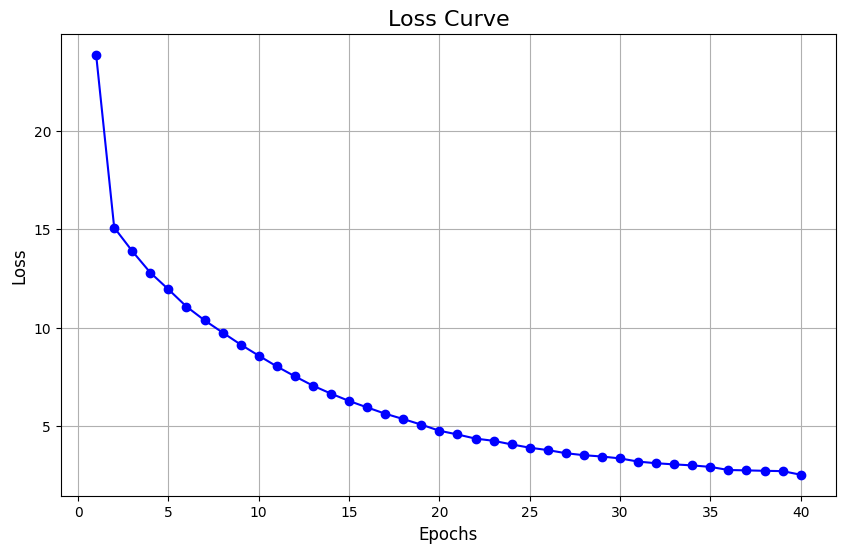

In [ ]:
import matplotlib.pyplot as plt

# Epochs and Loss data
epochs = list(range(1, 41))
loss = [
    -23.8618, -15.0805, -13.8826, -12.7905, -11.9414, -11.0660, -10.3691, -9.7480, -9.1359, -8.5727,
    -8.0258, -7.5234, -7.0473, -6.6437, -6.2710, -5.9429, -5.6237, -5.3514, -5.0673, -4.7582,
    -4.5688, -4.3585, -4.2458, -4.0625, -3.8960, -3.7746, -3.6164, -3.5151, -3.4476, -3.3518,
    -3.1910, -3.1061, -3.0479, -2.9967, -2.9197, -2.7627, -2.7433, -2.7216, -2.7057, -2.5229
]
loss_positive = [-i for i in loss]
# Create the loss curve plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_positive, marker='o', color='b', linestyle='-', markersize=6)
plt.title('Loss Curve', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
# Save the trained model
from google.colab import drive
drive.mount('/content/drive')
# torch.save(rbm.state_dict(), "/content/drive/MyDrive/research/rbm_mnist.pth")
# print("✅ Model saved as rbm_mnist.pth")


Mounted at /content/drive


In [ ]:
# Load the saved model
rbm_loaded = RBM(num_visible=28*28, num_hidden=256).to(device)  # Initialize same architecture
rbm_loaded.load_state_dict(torch.load("/content/drive/MyDrive/research/rbm_mnist.pth", map_location=torch.device('cpu')))
rbm_loaded.eval()  # Set to evaluation mode
print("✅ Model loaded successfully")
rbm = rbm_loaded

<ipython-input-9-88555daaefe1>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  rbm_loaded.load_state_dict(torch.load("/content/drive/MyDrive/research/rbm_mnist.pth", map_lo

✅ Model loaded successfully


In [ ]:
# import joblib
# joblib.dump(classifier, "/content/drive/MyDrive/research/logistic_classifier.pkl")

# print("Models saved successfully!")


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
rbm= rbm_loaded
# Extract features using the trained RBM
train_features, train_labels = rbm.extract_features(train_loader)
# test_features, test_labels = rbm.extract_features(test_loader)

# Train SVM Classifier
# classifier = SVC(kernel='rbf', C=1.0, gamma='scale')  # RBF kernel for better performance
# classifier.fit(train_features, train_labels)

# # Evaluate Model
# predictions = classifier.predict(test_features)
# accuracy = accuracy_score(test_labels, predictions)
# print(f"Classification Accuracy: {accuracy:.4f}")


In [ ]:
# import joblib
# joblib.dump(classifier, "/content/drive/MyDrive/research/svm_classifier.pkl")

# print("Models saved successfully!")



In [ ]:

import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# Predict using the loaded classifier
# Load trained SVM classifier
svm_path = "/content/drive/MyDrive/research/svm_classifier.pkl"
classifier = joblib.load(svm_path)

predictions = classifier.predict(train_features)

# Classification Report (Precision, Recall, F1-Score, Support)
report = classification_report(train_labels, predictions)
print("Classification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(train_labels, predictions)

# Plot confusion matrix using seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



KeyboardInterrupt: 

In [ ]:
accuracy = accuracy_score(train_labels, predictions)
print(f"Overall Classification Accuracy: {accuracy:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



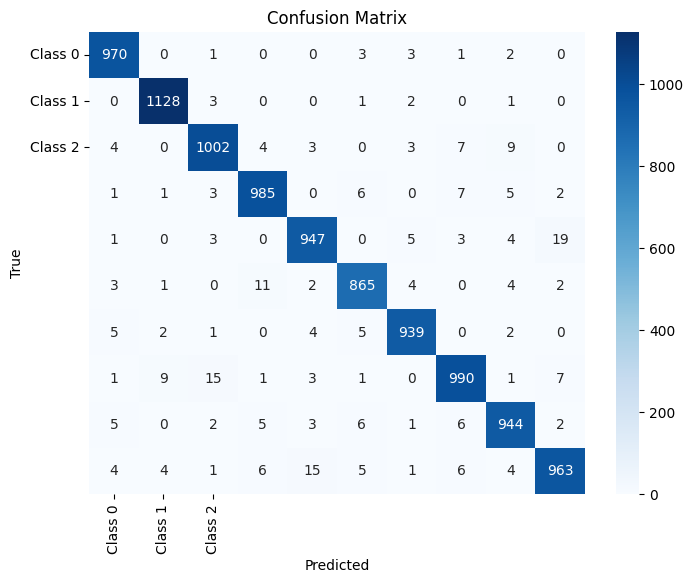

Overall Classification Accuracy: 0.9733


In [ ]:

import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# Predict using the loaded classifier
# Load trained SVM classifier
svm_path = "/content/drive/MyDrive/research/svm_classifier.pkl"
classifier = joblib.load(svm_path)

predictions = classifier.predict(test_features)

# Classification Report (Precision, Recall, F1-Score, Support)
report = classification_report(test_labels, predictions)
print("Classification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Plot confusion matrix using seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Overall accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Overall Classification Accuracy: {accuracy:.4f}")

In [ ]:
def gibbs_sampling(rbm, num_samples=10, num_iterations=10):
    """Generate new samples by alternating Gibbs sampling between visible and hidden units."""
    # Randomly initialize visible states (MNIST images are binary: 0 or 1)
    v = torch.rand(num_samples, rbm.num_visible, device=device) > 0.5  # Random binary visible state
    v = v.float()  # Convert to float for matrix operations

    for _ in range(num_iterations):
        # Step 1: Sample hidden states from visible states
        h_prob = torch.sigmoid(torch.matmul(v, rbm.W.t()) + rbm.h_bias)  # Compute hidden probabilities
        h = (h_prob > 0.5).float()  # Sample hidden states

        # Step 2: Sample visible states from hidden states
        v_prob = torch.sigmoid(torch.matmul(h, rbm.W) + rbm.v_bias)  # Compute visible probabilities
        v = (v_prob > 0.5).float()  # Sample visible states

    # Visualize generated images
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axes[i].imshow(v[i].cpu().view(28, 28), cmap="gray")
        axes[i].axis("off")
    plt.suptitle("Generated Images from RBM")
    plt.show()

# Generate new images using Gibbs sampling
gibbs_sampling(rbm_loaded, num_samples=10, num_iterations=20)


# **What is a Deep Belief Network (DBN)?**
A **Deep Belief Network (DBN)** is a generative model made up of multiple layers of **Restricted Boltzmann Machines (RBMs)** stacked on top of each other. DBNs are used for unsupervised learning and are good at learning hierarchical feature representations of the input data.

The basic structure of a DBN is:
1. **Input Layer**: The first layer that takes in raw data (e.g., images, text, etc.).
2. **Hidden Layers**: Multiple hidden layers (each one being an RBM) that progressively learn more abstract features.
3. **Output Layer**: The final layer typically used for classification or reconstruction tasks.

### **How does a DBN work?**
1. **Layer-Wise Pre-Training (Unsupervised Learning)**: Each layer of the DBN is trained as a **Restricted Boltzmann Machine (RBM)**. In this phase, the model learns to reconstruct the input data by capturing the dependencies in the data.
   - The bottom-up phase involves passing the input data through the network to learn the parameters.
   - The top-down phase involves reconstructing the data from the learned features.
   
2. **Fine-Tuning (Supervised Learning)**: After pre-training, the whole DBN is fine-tuned using supervised learning techniques (like backpropagation) to improve the network for tasks like classification.

### **Steps to Create a DBN:**
1. **Pre-training with RBMs**: Pre-train each layer of the DBN as an RBM.
2. **Fine-Tuning**: Once all layers are pre-trained, fine-tune the entire network using a supervised learning algorithm.

### **DBN Components:**
1. **RBM**: A neural network layer used in DBN, which is essentially a bipartite graph where each visible unit is connected to every hidden unit.
2. **Contrastive Divergence (CD)**: The algorithm used to train each RBM. It updates the weights based on the difference between the data-driven and model-driven distributions.

### **Training a DBN:**
1. **Layer-Wise Pre-Training**: Train each RBM one by one on the data.
2. **Fine-Tuning**: Use gradient-based optimization methods (like SGD or Adam) to fine-tune the entire DBN model.

---

### **Implementation of DBN with PyTorch:**

Let's break down the process of implementing a **Deep Belief Network** with PyTorch.

1. **Define the RBM Layer**: We'll define a basic RBM layer first. An RBM consists of visible and hidden layers, and we need to learn the weights that connect these layers.

2. **Pre-training the DBN**: We'll use Contrastive Divergence (CD) to train the RBM layers one by one.

3. **Fine-Tuning the DBN**: After pre-training, we will fine-tune the whole network using backpropagation.

---


### **Summary of Steps:**

1. **Define the RBM layer** and train it using contrastive divergence.
2. **Pre-train the DBN** layer by layer using RBMs.
3. **Fine-tune the DBN** with a classifier head using backpropagation.
4. **Generate samples** from the trained DBN.

### **Next Steps:**
- After training the model, you can use it for classification tasks or generate new data by sampling from the visible units after pre-training.
- You can also explore various optimizers and experiment with hyperparameters.

This will give you an introduction to **Deep Belief Networks (DBN)**. Let me know if you'd like me to dive deeper into any part!# Deep Belief Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import time

class RBM(nn.Module):
    """Restricted Boltzmann Machine implementation"""

    def __init__(self, n_visible, n_hidden):
        super(RBM, self).__init__()
        self.n_visible = n_visible
        self.n_hidden = n_hidden

        # Initialize weights and biases
        self.weights = nn.Parameter(torch.randn(n_visible, n_hidden) * 0.01)
        self.v_bias = nn.Parameter(torch.zeros(n_visible))
        self.h_bias = nn.Parameter(torch.zeros(n_hidden))

    def visible_to_hidden(self, v):
        """Compute hidden probabilities given visible units"""
        hidden_activation = F.linear(v, self.weights.t(), self.h_bias)
        hidden_probs = torch.sigmoid(hidden_activation)
        return hidden_probs

    def hidden_to_visible(self, h):
        """Compute visible probabilities given hidden units"""
        visible_activation = F.linear(h, self.weights, self.v_bias)
        visible_probs = torch.sigmoid(visible_activation)
        return visible_probs

    def sample_hidden(self, v):
        """Sample hidden states given visible states"""
        hidden_probs = self.visible_to_hidden(v)
        hidden_states = torch.bernoulli(hidden_probs)
        return hidden_states, hidden_probs

    def sample_visible(self, h):
        """Sample visible states given hidden states"""
        visible_probs = self.hidden_to_visible(h)
        visible_states = torch.bernoulli(visible_probs)
        return visible_states, visible_probs

    def free_energy(self, v):
        """Compute free energy for a visible vector"""
        hidden_activation = F.linear(v, self.weights.t(), self.h_bias)
        visible_bias_term = torch.matmul(v, self.v_bias)
        hidden_term = torch.sum(F.softplus(hidden_activation), dim=1)
        return -visible_bias_term - hidden_term

    def forward(self, v):
        """Forward pass (for compatibility with PyTorch modules)"""
        return self.visible_to_hidden(v)

    def contrastive_divergence(self, v_data, k=1):
        """Perform k-step contrastive divergence"""
        # Positive phase
        h_data, h_data_prob = self.sample_hidden(v_data)

        # Negative phase (Gibbs sampling)
        v_model = v_data.clone()
        h_model = h_data.clone()

        for _ in range(k):
            v_model, v_model_prob = self.sample_visible(h_model)
            h_model, h_model_prob = self.sample_hidden(v_model)

        # Compute gradients
        positive_grad = torch.matmul(v_data.t(), h_data_prob)
        negative_grad = torch.matmul(v_model.t(), h_model_prob)

        # Return gradients for weight, visible bias, and hidden bias
        return {
            'weights': (positive_grad - negative_grad) / v_data.size(0),
            'v_bias': torch.mean(v_data - v_model, dim=0),
            'h_bias': torch.mean(h_data_prob - h_model_prob, dim=0)
        }

def train_rbm(rbm, dataloader, epochs=10, lr=0.01, k=1, device='cpu'):
    """Train a single RBM layer"""
    optimizer = optim.SGD(rbm.parameters(), lr=lr)

    rbm.to(device)
    reconstruction_errors = []

    for epoch in range(epochs):
        epoch_error = 0
        start_time = time.time()

        for batch_idx, (data, _) in enumerate(dataloader):
            data = data.view(data.size(0), -1).to(device)  # Flatten the data

            # Normalize data to [0,1] if needed
            if data.max() > 1:
                data = data / 255.0

            # Apply bernoulli sampling if data is real-valued
            v_data = torch.bernoulli(data)

            # Zero gradients
            optimizer.zero_grad()

            # Compute gradients using contrastive divergence
            grads = rbm.contrastive_divergence(v_data, k)

            # Manually set gradients
            rbm.weights.grad = -grads['weights']
            rbm.v_bias.grad = -grads['v_bias']
            rbm.h_bias.grad = -grads['h_bias']

            # Update parameters
            optimizer.step()

            # Compute reconstruction error
            with torch.no_grad():
                h, _ = rbm.sample_hidden(v_data)
                v_recon, _ = rbm.sample_visible(h)
                batch_error = F.mse_loss(v_data, v_recon)
                epoch_error += batch_error.item()

            if (batch_idx + 1) % 100 == 0:
                print(f'Epoch: {epoch+1}/{epochs} [{batch_idx+1}/{len(dataloader)}] Reconstruction error: {batch_error.item():.4f}')

        elapsed = time.time() - start_time
        avg_epoch_error = epoch_error / len(dataloader)
        reconstruction_errors.append(avg_epoch_error)
        print(f'Epoch: {epoch+1}/{epochs} completed in {elapsed:.2f}s. Average reconstruction error: {avg_epoch_error:.4f}')

    return reconstruction_errors

class DBN(nn.Module):
    """Deep Belief Network implementation"""

    def __init__(self, visible_size, hidden_sizes):
        """
        Initialize a Deep Belief Network

        Args:
            visible_size: Size of the input layer
            hidden_sizes: List of sizes for the hidden layers
        """
        super(DBN, self).__init__()

        self.n_layers = len(hidden_sizes)
        layer_sizes = [visible_size] + hidden_sizes

        # Create RBM layers
        self.rbm_layers = nn.ModuleList([
            RBM(layer_sizes[i], layer_sizes[i+1])
            for i in range(self.n_layers)
        ])

    def forward(self, x):
        """Forward pass through all RBM layers"""
        for i, rbm in enumerate(self.rbm_layers):
            x, _ = rbm.sample_hidden(x)
        return x

    def pretrain(self, dataloader, epochs_per_layer=10, lr=0.01, cd_k=1, device='cpu'):
        """
        Greedy layer-wise pretraining of the DBN

        Args:
            dataloader: DataLoader for training data
            epochs_per_layer: Number of epochs to train each layer
            lr: Learning rate
            cd_k: Number of contrastive divergence steps
            device: Device to run training on
        """
        self.to(device)

        # Train each RBM layer
        for i, rbm in enumerate(self.rbm_layers):
            print(f"\n{'='*50}")
            print(f"Pretraining RBM layer {i+1}/{self.n_layers}")
            print(f"{'='*50}")

            # For first layer, use original data
            if i == 0:
                train_rbm(rbm, dataloader, epochs=epochs_per_layer, lr=lr, k=cd_k, device=device)

            # For subsequent layers, transform data using previous layers
            else:
                print(f"Transforming data for layer {i+1}...")
                transformed_data = []
                transformed_labels = []

                # Use previous layers to transform the input data
                with torch.no_grad():
                    for batch, labels in dataloader:
                        batch = batch.view(batch.size(0), -1).to(device)
                        if batch.max() > 1:
                            batch = batch / 255.0

                        # Pass data through previous layers
                        for prev_rbm in self.rbm_layers[:i]:
                            batch, _ = prev_rbm.sample_hidden(batch)

                        transformed_data.append(batch)
                        transformed_labels.append(labels)

                # Create a new dataloader with transformed data
                transformed_data = torch.cat(transformed_data, 0)
                transformed_labels = torch.cat(transformed_labels, 0)
                transformed_dataset = TensorDataset(transformed_data, transformed_labels)
                transformed_dataloader = DataLoader(
                    transformed_dataset,
                    batch_size=dataloader.batch_size,
                    shuffle=True
                )

                # Train current RBM with transformed data
                train_rbm(rbm, transformed_dataloader, epochs=epochs_per_layer, lr=lr, k=cd_k, device=device)

class DBNClassifier(nn.Module):
    """DBN with a classifier layer for supervised learning"""

    def __init__(self, visible_size, hidden_sizes, output_size):
        super(DBNClassifier, self).__init__()

        # DBN for feature extraction
        self.dbn = DBN(visible_size, hidden_sizes)

        # Classifier layer
        self.classifier = nn.Sequential(
            nn.Linear(hidden_sizes[-1], output_size),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        # Feature extraction
        features = self.dbn(x)

        # Classification
        return self.classifier(features)

    def pretrain(self, dataloader, epochs_per_layer=10, lr=0.01, cd_k=1, device='cpu'):
        """Pretrain the DBN layers"""
        return self.dbn.pretrain(dataloader, epochs_per_layer, lr, cd_k, device)

    def finetune(self, train_dataloader, test_dataloader=None, epochs=10, lr=0.01, device='cpu'):
        """Fine-tune the entire network using backpropagation"""
        self.to(device)

        criterion = nn.NLLLoss()
        optimizer = optim.Adam(self.parameters(), lr=lr)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5)

        train_losses = []
        test_losses = []
        train_accuracies = []
        test_accuracies = []

        for epoch in range(epochs):
            # Training
            self.train()
            running_loss = 0.0
            correct = 0
            total = 0
            start_time = time.time()

            for data, targets in train_dataloader:
                data = data.view(data.size(0), -1).to(device)
                if data.max() > 1:
                    data = data / 255.0
                targets = targets.to(device)

                # Zero gradients
                optimizer.zero_grad()

                # Forward pass
                outputs = self(data)

                # Compute loss
                loss = criterion(outputs, targets)

                # Backward pass and optimization
                loss.backward()
                optimizer.step()

                # Statistics
                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += targets.size(0)
                correct += (predicted == targets).sum().item()

            train_loss = running_loss / len(train_dataloader)
            train_accuracy = 100 * correct / total
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)

            elapsed = time.time() - start_time
            print(f'Epoch: {epoch+1}/{epochs} completed in {elapsed:.2f}s')
            print(f'Training Loss: {train_loss:.4f} Accuracy: {train_accuracy:.2f}%')

            # Testing if test_dataloader is provided
            if test_dataloader is not None:
                self.eval()
                test_loss = 0.0
                correct = 0
                total = 0

                with torch.no_grad():
                    for data, targets in test_dataloader:
                        data = data.view(data.size(0), -1).to(device)
                        if data.max() > 1:
                            data = data / 255.0
                        targets = targets.to(device)

                        # Forward pass
                        outputs = self(data)

                        # Compute loss
                        loss = criterion(outputs, targets)
                        test_loss += loss.item()

                        # Statistics
                        _, predicted = torch.max(outputs.data, 1)
                        total += targets.size(0)
                        correct += (predicted == targets).sum().item()

                test_loss = test_loss / len(test_dataloader)
                test_accuracy = 100 * correct / total
                test_losses.append(test_loss)
                test_accuracies.append(test_accuracy)

                print(f'Test Loss: {test_loss:.4f} Accuracy: {test_accuracy:.2f}%')

                # Update learning rate
                scheduler.step(test_loss)

            print('-' * 50)

        # Return training history
        history = {
            'train_loss': train_losses,
            'train_accuracy': train_accuracies,
            'test_loss': test_losses,
            'test_accuracy': test_accuracies
        }

        return history

def visualize_weights(rbm, nrow=10, ncol=10, figsize=(10, 10)):
    """Visualize the weights of an RBM as images"""
    weights = rbm.weights.data.cpu().numpy()

    # Determine the image shape based on the visible units
    if rbm.n_visible in [784, 28*28]:  # MNIST
        img_shape = (28, 28)
    else:
        # Try to find factors for a square-ish image
        side = int(np.sqrt(rbm.n_visible))
        img_shape = (side, rbm.n_visible // side)

    fig, axes = plt.subplots(nrow, ncol, figsize=figsize)

    # Select a subset of hidden units to visualize
    n_vis = min(nrow * ncol, rbm.n_hidden)

    for i in range(nrow):
        for j in range(ncol):
            idx = i * ncol + j
            if idx < n_vis:
                # Reshape weights for this hidden unit into an image
                weight_img = weights[:, idx].reshape(img_shape)

                # Display the image
                axes[i, j].imshow(weight_img, cmap='gray')
                axes[i, j].axis('off')
            else:
                axes[i, j].axis('off')

    plt.tight_layout()
    plt.savefig('rbm_weights.png')
    plt.show()

def plot_training_history(history):
    """Plot training and test loss/accuracy"""
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    if history['test_loss']:
        plt.plot(history['test_loss'], label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss during Training')

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_accuracy'], label='Train Accuracy')
    if history['test_accuracy']:
        plt.plot(history['test_accuracy'], label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.title('Accuracy during Training')

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

def generate_samples(rbm, num_samples=10, gibbs_steps=1000, device='cpu'):
    """Generate samples from an RBM using Gibbs sampling"""
    rbm.to(device)

    # Start with random visible units
    v = torch.rand(num_samples, rbm.n_visible).to(device)

    # Perform Gibbs sampling
    for _ in range(gibbs_steps):
        h, _ = rbm.sample_hidden(v)
        v, _ = rbm.sample_visible(h)

    # Visualize the generated samples
    plt.figure(figsize=(15, 3))

    # Determine the image shape based on the visible units
    if rbm.n_visible in [784, 28*28]:  # MNIST
        img_shape = (28, 28)
    else:
        # Try to find factors for a square-ish image
        side = int(np.sqrt(rbm.n_visible))
        img_shape = (side, rbm.n_visible // side)

    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(v[i].cpu().detach().view(img_shape), cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('generated_samples.png')
    plt.show()

    return v

def load_mnist(batch_size=64):
    """Load MNIST dataset and create train/test dataloaders"""
    # Define transformations
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    # Download and load MNIST dataset
    train_dataset = torchvision.datasets.MNIST(
        root='./data',
        train=True,
        transform=transform,
        download=True
    )

    test_dataset = torchvision.datasets.MNIST(
        root='./data',
        train=False,
        transform=transform,
        download=True
    )

    # Create dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False
    )

    return train_loader, test_loader

def main():
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Set random seed for reproducibility
    torch.manual_seed(42)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(42)

    # Load MNIST dataset
    print("Loading MNIST dataset...")
    batch_size = 100
    train_loader, test_loader = load_mnist(batch_size)
    print("Dataset loaded successfully!")

    # Define the network architecture
    visible_size = 28 * 28   # MNIST image size
    hidden_sizes = [500, 250, 100]  # 3 hidden layers
    output_size = 10  # 10 digits

    # Create the DBN classifier
    print("\nCreating DBN classifier...")
    dbn_classifier = DBNClassifier(visible_size, hidden_sizes, output_size)
    print("DBN classifier created with architecture:")
    print(f"Input layer: {visible_size} units")
    for i, size in enumerate(hidden_sizes):
        print(f"Hidden layer {i+1}: {size} units")
    print(f"Output layer: {output_size} units")

    # Pretrain the DBN
    print("\nPretraining DBN layers...")
    dbn_classifier.pretrain(
        train_loader,
        epochs_per_layer=3,  # Use more epochs (10+) for better results
        lr=0.01,
        cd_k=1,
        device=device
    )
    print("Pretraining completed!")

    # Visualize the weights of the first RBM layer
    print("\nVisualizing weights of the first RBM layer...")
    visualize_weights(dbn_classifier.dbn.rbm_layers[0], nrow=5, ncol=10, figsize=(10, 5))

    # Generate samples from the first RBM layer
    print("\nGenerating samples from the first RBM layer...")
    samples = generate_samples(dbn_classifier.dbn.rbm_layers[0], num_samples=10, gibbs_steps=1000, device=device)

    # Fine-tune the entire network
    print("\nFine-tuning the entire network...")
    history = dbn_classifier.finetune(
        train_loader,
        test_loader,
        epochs=5,  # Use more epochs (10+) for better results
        lr=0.001,
        device=device
    )

    # Plot training history
    print("\nPlotting training history...")
    plot_training_history(history)

    # Evaluate the model on test data
    print("\nEvaluating model on test data...")
    dbn_classifier.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, targets in test_loader:
            data = data.view(data.size(0), -1).to(device)
            if data.max() > 1:
                data = data / 255.0
            targets = targets.to(device)

            outputs = dbn_classifier(data)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    final_accuracy = 100 * correct / total
    print(f"Final test accuracy: {final_accuracy:.2f}%")

    # Save the model
    print("\nSaving model...")
    torch.save(dbn_classifier.state_dict(), 'dbn_mnist_model.pt')
    print("Model saved successfully!")

    print("\nDone!")

if __name__ == "__main__":
    main()